In [1]:
import geopandas as gpd

# read in all the shapefiles for all the isochrone data
iso_15_2015 = gpd.read_file('isochrones/DGUID_ISO_15min_2015.shp')
iso_15_2025 = gpd.read_file('isochrones/DGUID_ISO_15min_2025.shp')

iso_30_2015 = gpd.read_file('isochrones/DGUID_ISO_30min_2015.shp')
iso_30_2025 = gpd.read_file('isochrones/DGUID_ISO_30min_2025.shp')


In [2]:
toronto_ct = gpd.read_file('toronto_census_all.shp')

In [3]:
df_15_2015 = iso_15_2015[['DGUID', 'area_perce']]
df_15_2025 = iso_15_2025[['DGUID', 'area_perce']]

df_30_2015 = iso_30_2015[['DGUID', 'area_perce']]
df_30_2025 = iso_30_2025[['DGUID', 'area_perce']]

In [4]:
df_15_2015 = df_15_2015.rename(columns = {'area_perce': '15_2015'})
df_15_2025 = df_15_2025.rename(columns = {'area_perce': '15_2025'})

df_30_2015 = df_30_2015.rename(columns = {'area_perce': '30_2015'})
df_30_2025 = df_30_2025.rename(columns = {'area_perce': '30_2025'})

In [5]:
toronto_ct = toronto_ct.merge(df_15_2015, how = 'right', on = 'DGUID')
toronto_ct = toronto_ct.merge(df_15_2025, how = 'right', on = 'DGUID')
toronto_ct = toronto_ct.merge(df_30_2015, how = 'right', on = 'DGUID')
toronto_ct = toronto_ct.merge(df_30_2025, how = 'right', on = 'DGUID')

In [6]:
# the area percentage values were never multiplied by 100, making them inconviently small, so this is to correct this and help legibility
cols = ['15_2025', '15_2015', '30_2025', '30_2015']
for col in cols:
    toronto_ct[col] = toronto_ct[col] * 100

In [7]:
# Calculate the change between years as a row-wise subtraction
toronto_ct['15_change'] = (toronto_ct['15_2025']*100) - (toronto_ct['15_2015']*100)
toronto_ct['30_change'] = (toronto_ct['30_2025']*100) - (toronto_ct['30_2015']*100)

In [8]:
# set a new column to be true if and only if the isochrone gained size between the years
toronto_ct['15_increase'] = toronto_ct.apply(lambda x: x['15_change'] > 0, axis=1)
toronto_ct['30_increase'] = toronto_ct.apply(lambda x: x['30_change'] > 0, axis=1)

C:\Users\saman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\mapclassify\classifiers.py:1767: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)


                 DGUID  Percentage  Median tot  Homeowners  \
0  2021S05075350004.00        12.7     50000.0         7.5   
1  2021S05075350007.01        10.3     57200.0        13.1   
2  2021S05075350200.01         8.6     68000.0        32.8   
3  2021S05075350248.03         7.7     99000.0        80.8   
4  2021S05075350249.01         7.5    102000.0        84.4   

                                            geometry   15_2015   15_2025  \
0  POLYGON ((7220963.994 925916.097, 7220979.511 ...  0.142228  0.137614   
1  POLYGON ((7221415.046 925996.72, 7221452.109 9...  0.120410  0.166947   
2  MULTIPOLYGON (((7217298.309 922238.351, 721709...  0.019428  0.019428   
3  POLYGON ((7202073.494 935418.337, 7202106.211 ...  0.009556  0.009556   
4  POLYGON ((7205781.726 936458.503, 7205772.586 ...  0.161352  0.163905   

    30_2015   30_2025  15_change   30_change  15_increase  30_increase  
0  2.324250  1.883360  -0.461373  -44.089083        False        False  
1  2.079670  1.638125   

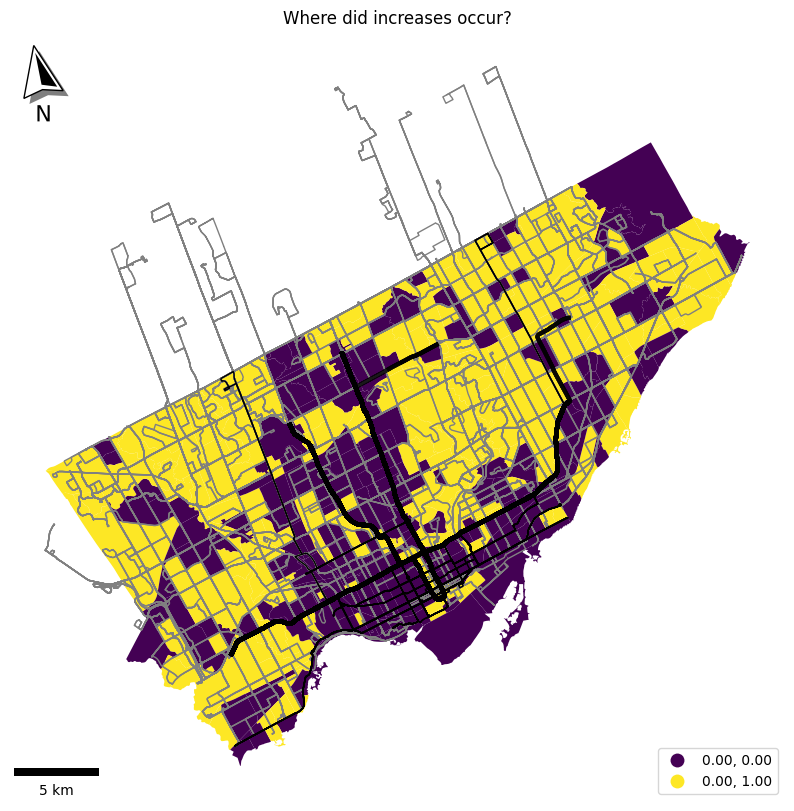

In [16]:
import plotter
# visualizing the distribution

toronto_ct = toronto_ct.to_crs(3347)
fig, ax = plotter.plot_choropleth(toronto_ct, title = 'Where did increases occur?', column = '30_increase', cmap = 'viridis')

plotter.plot_bus_lines(fig, ax, '2015')
plotter.plot_streetcar_lines(fig, ax, '2015')
plotter.plot_subway_lines(fig, ax, '2015')

print(toronto_ct.head(5))

In [ ]:
toronto_ct.to_file('isochrones_change_final.shp') # output the now robust and complete shapefile of all the variables

C:\Users\saman\AppData\Local\Temp\ipykernel_33256\3964255048.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  toronto_ct.to_file('to_all_variables_for_cluster_analysis.shp') # output the now robust and complete shapefile of all the variables
C:\Users\saman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: '15_increase' to '15_increas'
  ogr_write(
C:\Users\saman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: '30_increase' to '30_increas'
  ogr_write(


(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Where did increases and decreases occur?'}>)

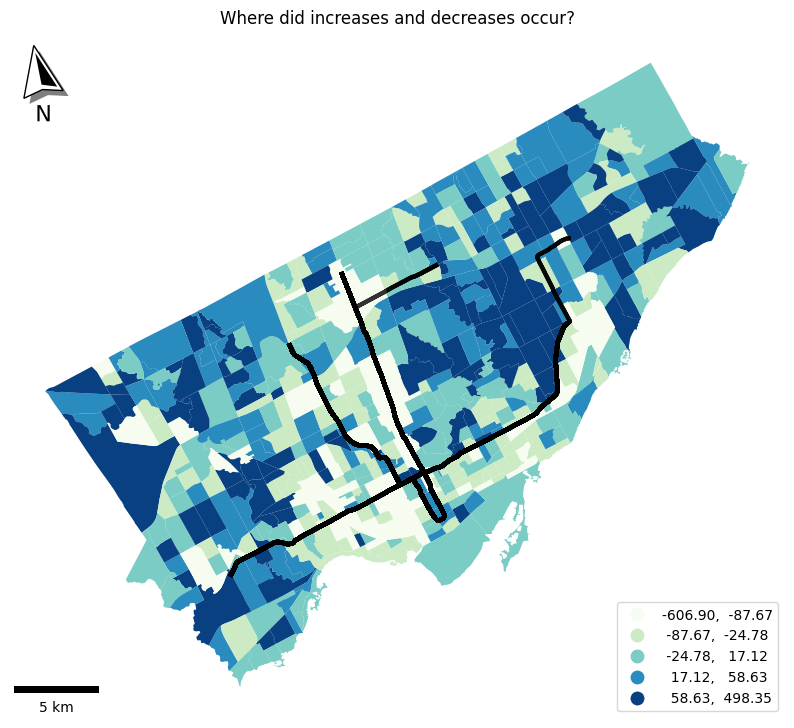

In [18]:
fig, ax = plotter.plot_choropleth(toronto_ct, title = 'Where did increases and decreases occur?', column = '30_change')
plotter.plot_subway_lines_2015(fig, ax)

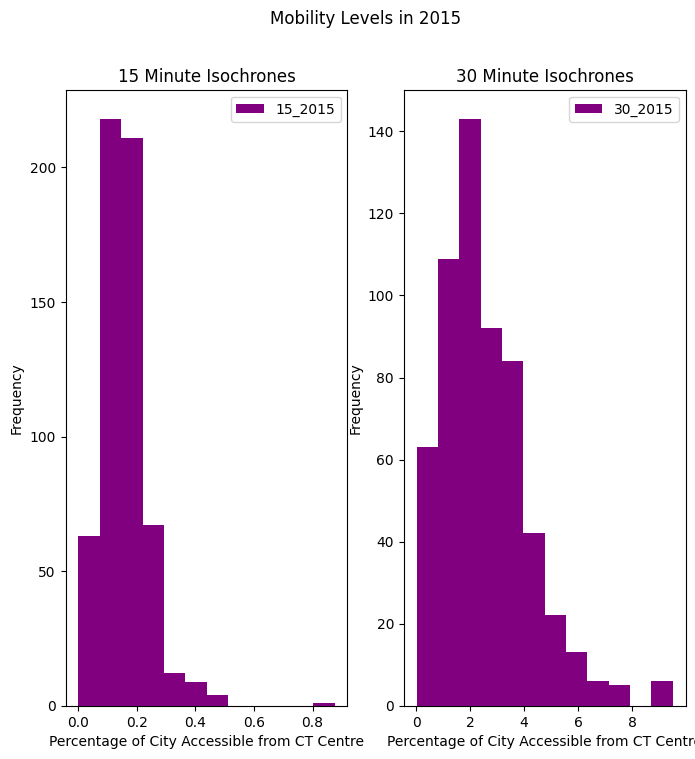

In [12]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (8,8))
fig.suptitle('Mobility Levels in 2015')


toronto_ct.plot(kind = 'hist',
                column = '15_2015', bins = 12, legend=True, ax=ax1, color = 'purple')
ax1.set_title('15 Minute Isochrones')
ax1.set_xlabel('Percentage of City Accessible from CT Centre')
toronto_ct.plot(kind='hist', bins = 12,
                 column='30_2015', legend=True, ax=ax2, color = 'purple')
ax2.set_title('30 Minute Isochrones')
ax2.set_xlabel('Percentage of City Accessible from CT Centre')

fig.savefig('2015_mobility_histograms')

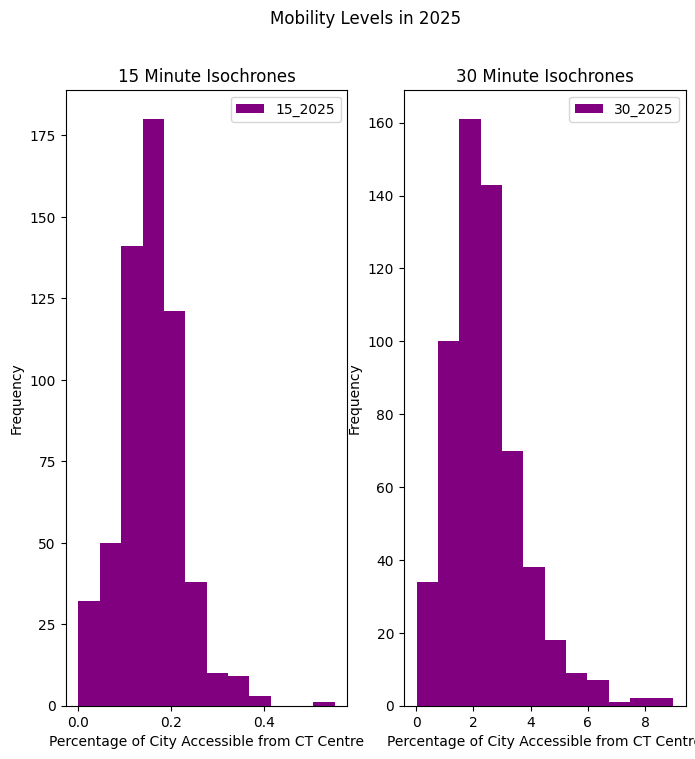

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (8,8))
fig.suptitle('Mobility Levels in 2025')


toronto_ct.plot(kind = 'hist',
                column = '15_2025', bins = 12, legend=True, ax=ax1, color = 'purple')
ax1.set_title('15 Minute Isochrones')
ax1.set_xlabel('Percentage of City Accessible from CT Centre')
toronto_ct.plot(kind='hist', bins = 12,
                 column='30_2025', legend=True, ax=ax2, color = 'purple')
ax2.set_title('30 Minute Isochrones')
ax2.set_xlabel('Percentage of City Accessible from CT Centre')

fig.savefig('mobility 2025 histograms')